<a href="https://colab.research.google.com/github/RohanBolle/BigCrunch/blob/main/FreidmannModified_QuantumCorrections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
In the current model of cosmology, there is the Universal gravitational constant G. Many studies have been done to speculate that G was in fact different than what we know it to be today. Using an already studied gravitational perameter, we relook at the standard model in the early universe and also apply error corrections.

The current model is the friedman-lemaitre equation \begin{equation}
(\frac{\dot{R}}{R})^2=\frac{8\pi G\rho}{3}+\frac{\alpha}
{R^2}
\end{equation}
 and the correponding  accelaration equation is \begin{equation}\frac{\ddot{R}}{R}=-\frac{4\pi G}{3}(\rho +3P).\end{equation} Rederiving the friedman equation so that G can vary with time, we get \begin{equation} H^2≡\frac{\dot{R^2}}{R^2}=\frac{8\pi}{3}\rho \left[ G-R∫\frac{dG}{R}\right]  +\frac{2C}{R^2} \end{equation}
 Refining the equation, let $G^*≡G-R∫\frac{dG}{R}.$

# Define G* functions

In [157]:
from sympy import symbols, integrate, simplify,diff ,  init_printing, lambdify, exp, ln
import numpy as np
from scipy.special import expi,exp1 , exp2

# from math import *
# Import exp1 from scipy.special
#from sympy.functions.special.gamma_functions import Ei # Import the SymPy Ei function

a,B,l ,t = symbols('a, B, l, t')
B = 0.1
# B = np.linspace(0,0.9, 20)
l = 0

G0 = 1 #6.67430e-11  # m^3 kg^-1 s^-2
init_printing(use_unicode=True)

#define G(a) function
G = [ G0*a**B, (1+l*ln(a))   ] #(1+a)*exp(-a) , exp(l*a)

def G0_Star(i,a):
  g= diff(G[i],a)
  dG = integrate(g/a,a )
  return simplify( G[i]-a*dG)

def G1_Star(i,a):
  g= diff(G[i],a)
  dG = integrate(2*G[i]*g/a**(2),a )
  return simplify(G[i]**(2)-a**(2)*dG )

def G2_Star(i,a):
  g= diff(G[i],a)
  dG = integrate(2*G[i]*g/a**(3),a )
  return simplify(G[i]**(2)-a**(3)*dG )

custom_mapping = {"Ei": expi ,"expint": lambda n, x: exp2(x) if n == 2 else None}

n=1
f0 = lambdify(a, G0_Star(n,a), modules=[custom_mapping, 'numpy'])
f1 = lambdify(a, G1_Star(n,a), modules=[custom_mapping, 'numpy'])
f2 = lambdify(a, G2_Star(n,a), modules=[custom_mapping, 'numpy'])

print(G0_Star(n,a))
print(G1_Star(n,a))
print(G2_Star(n,a))


1
1
1


#Solving Modified Friedmann

In [158]:
from scipy.integrate import solve_ivp
import cmath
# from scipy.special import expint
# from scipy.special import expi, expint
# from sympy.functions.special.gamma_functions import Ei # Import the SymPy Ei function


# Constants (using units where c = 1)
G0 = 1 #6.67430e-11  # m^3 kg^-1 s^-2
H0 = 1/13.8  #Hubble constant in 1/s
c =1 #3e8

params = {
    "radiation"      : 0.00,   # Ω_r [0.10]
    "matter"         : 1.00,   # Ω_m [1.20]
    "cosmic_strings" : 0.00,   # Ω_cs[0.05]
    "domain_walls"   : 0.00,   # Ω_dw[0.05]
    "stiff_matter"   : 0.00,   # Ω_sm[0.0]
    "dark_energy"    : 0.00   # Ω_Λ [-0.50](NEGATIVE ⇒ acts like an attractive force)
}



w_map = {
    "radiation"      : 1/3,
    "matter"         : 0.0,
    "cosmic_strings" : -1/3,
    "domain_walls"   : -2/3,
    "stiff_matter"   : 1.0,
    "dark_energy"    : -1.0
}

Omega_total = sum(params.values())
Omega_k = 1.0 - Omega_total        # closed if Ω_k < 0
Omega_k = 1.0 - Omega_total        # closed if Ω_k < 0
print(f"ΣΩ_i = {Omega_total:.3f}   →   Ω_k = {Omega_k:.3f}")


def friedmann(t,a):
    term_sum = Omega_k * a**-2                     # curvature
    for name, Ω in params.items():
        w = w_map[name]
        term_sum += Ω *a**(-3 * (1 + w))
    return a *H0* (term_sum)**0.5

def friedmannMod(t,a):

    lambda_ = 1
    zeta = 1

    term1 = (f0(a))/(G0)
    term2 = (H0**2 * f1(a)) / (2 * G0**2 * c**2)
    term3 = (f2(a)) /(G0* c**3)

    term_sum = Omega_k * a**-2                     # curvature
    for name, Ω in params.items():
        w = w_map[name]
        term_sum += Ω * term1 * a**(-3 * (1 + w)) + lambda_ * Ω**2 * term2 * a**(-6 * (1 + w)) - zeta * Ω * term3 * a**(-3 * (1 + w))
    return a *H0* (term_sum)**0.5



# Time span and initial condition
a_max =0.5
t_span = (0.01, a_max)  # in seconds (~6.3 billion years) 5e17
a0 = 1e-3       # Small scale factor at early time

sol0 = solve_ivp(lambda t, a: friedmann(t,a) , t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)
sol1 = solve_ivp(lambda t, a: friedmannMod(t,a) , t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)



ΣΩ_i = 1.000   →   Ω_k = 0.000


#Plots

ValueError: 
Can't calculate derivative wrt 0.501187233627272.

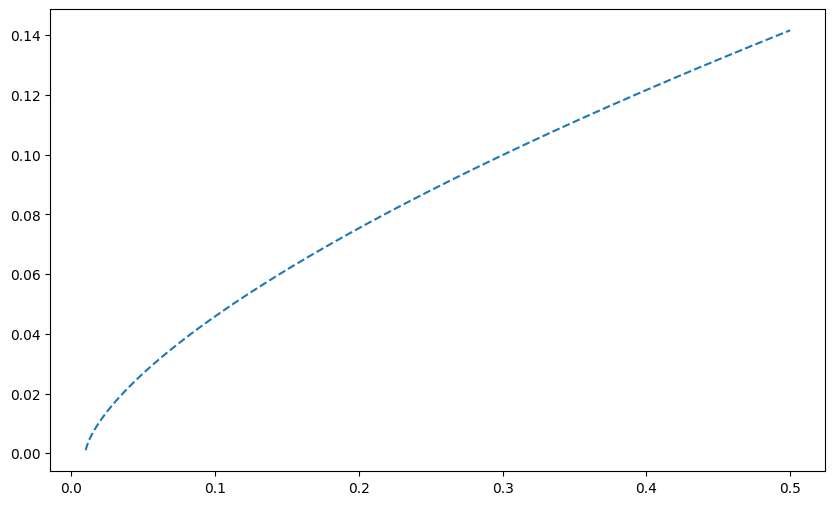

In [162]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1


plt.figure(figsize=(10, 6))
# plt1.figure(figsize=(10, 6))


# for b in np.linspace(0.1,1.0, 10):

#   G[0]= G0*a**b
#   n=1
#   f0 = lambdify(a, G0_Star(0,a), modules=[custom_mapping, 'numpy'])
#   f1 = lambdify(a, G1_Star(0,a), modules=[custom_mapping, 'numpy'])
#   f2 = lambdify(a, G2_Star(0,a), modules=[custom_mapping, 'numpy'])

#   sol1 = solve_ivp(lambda t, a: friedmannMod(t,a) , t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)
#   plt.plot(sol1.t  , sol1.y[0], label=f'B = {b:.1f}')
plt.plot(sol0.t  , sol0.y[0], label = 'Friedmann',linestyle= 'dashed')  # convert time to gigayears / (3.154e16)


def Bound(t,a,b):
  G[0] = G0*a**b
  f0 = lambdify(a, G0_Star(0,a), modules=[custom_mapping, 'numpy'])
  f1 = lambdify(a, G1_Star(0,a), modules=[custom_mapping, 'numpy'])
  f2 = lambdify(a, G2_Star(0,a), modules=[custom_mapping, 'numpy'])

  def friedmannMod(t,a):

    lambda_ = 1
    zeta = 1

    term1 = (f0(a))/(G0)
    term2 = (H0**2 * f1(a)) / (2 * G0**2 * c**2)
    term3 = (f2(a)) /(G0* c**3)

    term_sum = Omega_k * a**-2                     # curvature
    for name, Ω in params.items():
        w = w_map[name]
        term_sum += Ω * term1 * a**(-3 * (1 + w)) + lambda_ * Ω**2 * term2 * a**(-6 * (1 + w)) - zeta * Ω * term3 * a**(-3 * (1 + w))
    return a *H0* (term_sum)**0.5

    return friedmannMod(t,a)

solMax = solve_ivp(lambda t, a: Bound(t,a,0.1) , t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)
solMin = solve_ivp(lambda t, a: Bound(t,a,1.0) , t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)


plt.fill_between(solMax.t, solMax.y[0] , solMin.y[0] )


# def friedmannMod(t,a,s,q):

#     lambda_ = s
#     zeta = q

#     term1 = (f0(a))/(G0)
#     term2 = (H0**2 * f1(a)) / (2 * G0**2 * c**2)
#     term3 = (f2(a)) /(G0* c**3)

#     term_sum = Omega_k * a**-2                     # curvature
#     for name, Ω in params.items():
#         w = w_map[name]
#         term_sum += Ω * term1 * a**(-3 * (1 + w)) + lambda_ * Ω**2 * term2 * a**(-6 * (1 + w)) - zeta * Ω * term3 * a**(-3 * (1 + w))
#     return a *H0* (term_sum)**0.5


# for s in np.linspace(0.0,1.0, 10):
#   for q in np.linspace(0.0,1.0, 5):
#     sol1 = solve_ivp(lambda t, a: friedmannMod(t,a,s,q) , t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)
#     plt1.plot(sol1.t  , sol1.y[0], label=f'lambda = {s:.1f}')
# plt1.plot(sol0.t  , sol0.y[0], label = 'Friedmann',linestyle= 'dashed')  # convert time to gigayears / (3.154e16)




# plt.yscale('log')
plt.xlabel("Time (Gyr)")
plt.ylabel("Scale factor a(t)")
plt.title("Evolution of the Scale Factor from the First Friedmann Equation")
plt.legend()
plt.grid(True)
plt.show()
# plt1.yscale('log')
# plt1.xlabel("Time (Gyr)")
# plt1.ylabel("Scale factor a(t)")
# plt1.title("Evolution of the Scale Factor from the Modified Friedmann Equation")
# plt1.legend()
# plt1.grid(True)
# plt1.show()


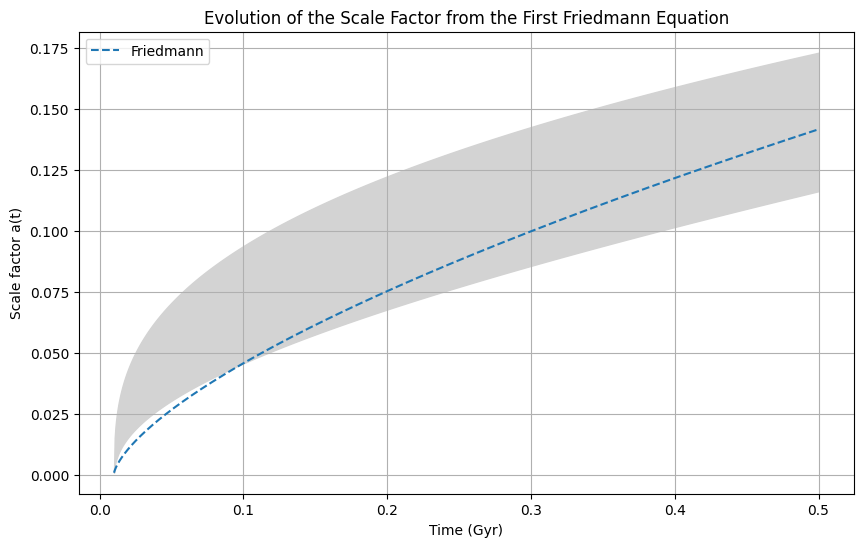

In [165]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from scipy.integrate import solve_ivp


plt.figure(figsize=(10, 6))
# plt1.figure(figsize=(10, 6))


# for b in np.linspace(0.1,1.0, 10):

#   G[0]= G0*a**b
#   n=1
#   f0 = lambdify(a, G0_Star(0,a), modules=[custom_mapping, 'numpy'])
#   f1 = lambdify(a, G1_Star(0,a), modules=[custom_mapping, 'numpy'])
#   f2 = lambdify(a, G2_Star(0,a), modules=[custom_mapping, 'numpy'])

#   sol1 = solve_ivp(lambda t, a: friedmannMod(t,a) , t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)
#   plt.plot(sol1.t  , sol1.y[0], label=f'B = {b:.1f}')
plt.plot(sol0.t  , sol0.y[0], label = 'Friedmann',linestyle= 'dashed')  # convert time to gigayears / (3.154e16)


def Bound(t,a,b):
  # Update G[0] for the current B value
  G[0] = G0 * a**b

  # Use the already defined and lambdified functions f0, f1, f2
  # Do not redefine or relambdify inside this function
  lambda_ = 1
  zeta = 1

  term1 = f0(a) / G0
  term2 = (H0**2 * f1(a)) / (2 * G0**2 * c**2)
  term3 = f2(a) / (G0 * c**3)

  term_sum = Omega_k * a**-2                     # curvature
  for name, Ω in params.items():
      w = w_map[name]
      term_sum += Ω * term1 * a**(-3 * (1 + w)) + lambda_ * Ω**2 * term2 * a**(-6 * (1 + w)) - zeta * Ω * term3 * a**(-3 * (1 + w))
  # Ensure the argument to the square root is non-negative
  return a * H0 * ( term_sum)**0.5


# Define lambdified functions for the Bound function outside of solve_ivp
# Note: These will be updated within the loop over B values
f0_bound = lambdify(a, G0_Star(0,a), modules=[custom_mapping, 'numpy'])
f1_bound = lambdify(a, G1_Star(0,a), modules=[custom_mapping, 'numpy'])
f2_bound = lambdify(a, G2_Star(0,a), modules=[custom_mapping, 'numpy'])

# Loop through different B values to plot the bounds
for current_B in [0.1, 1.0]:
    # Update G[0] for the current B value
    G[0] = G0 * a**current_B

    # Update the lambdified functions for the current B value
    f0_bound = lambdify(a, G0_Star(0,a), modules=[custom_mapping, 'numpy'])
    f1_bound = lambdify(a, G1_Star(0,a), modules=[custom_mapping, 'numpy'])
    f2_bound = lambdify(a, G2_Star(0,a), modules=[custom_mapping, 'numpy'])

    # Define the function to be passed to solve_ivp using the updated lambdified functions
    def friedmannMod_bound(t,a):
      lambda_ = 1
      zeta = 1

      term1 = f0_bound(a) / G0
      term2 = (H0**2 * f1_bound(a)) / (2 * G0**2 * c**2)
      term3 = f2_bound(a) / (G0 * c**3)

      term_sum = Omega_k * a**-2                     # curvature
      for name, Ω in params.items():
          w = w_map[name]
          term_sum += Ω * term1 * a**(-3 * (1 + w)) + lambda_ * Ω**2 * term2 * a**(-6 * (1 + w)) - zeta * Ω * term3 * a**(-3 * (1 + w))
      # Ensure the argument to the square root is non-negative
      return a * H0 * (max(0, term_sum))**0.5


    sol = solve_ivp(friedmannMod_bound, t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)

    if current_B == 0.1:
        solMax = sol
    else:
        solMin = sol


plt.fill_between(solMax.t, solMax.y[0] , solMin.y[0],color='lightgray' )


# def friedmannMod(t,a,s,q):

#     lambda_ = s
#     zeta = q

#     term1 = (f0(a))/(G0)
#     term2 = (H0**2 * f1(a)) / (2 * G0**2 * c**2)
#     term3 = (f2(a)) /(G0* c**3)

#     term_sum = Omega_k * a**-2                     # curvature
#     for name, Ω in params.items():
#         w = w_map[name]
#         term_sum += Ω * term1 * a**(-3 * (1 + w)) + lambda_ * Ω**2 * term2 * a**(-6 * (1 + w)) - zeta * Ω * term3 * a**(-3 * (1 + w))
#     return a * H0 * (term_sum)**0.5


# for s in np.linspace(0.0,1.0, 10):
#   for q in np.linspace(0.0,1.0, 5):
#     sol1 = solve_ivp(lambda t, a: friedmannMod(t,a,s,q) , t_span, [a0], t_eval=np.linspace(0.01,a_max,1000), method='RK45',  rtol=1e-5)
#     plt1.plot(sol1.t  , sol1.y[0], label=f'lambda = {s:.1f}')
# plt1.plot(sol0.t  , sol0.y[0], label = 'Friedmann',linestyle= 'dashed')  # convert time to gigayears / (3.154e16)




# plt.yscale('log')
plt.xlabel("Time (Gyr)")
plt.ylabel("Scale factor a(t)")
plt.title("Evolution of the Scale Factor from the First Friedmann Equation")
plt.legend()
plt.grid(True)
plt.show()
# plt1.yscale('log')
# plt1.xlabel("Time (Gyr)")
# plt1.ylabel("Scale factor a(t)")
# plt1.title("Evolution of the Scale Factor from the Modified Friedmann Equation")
# plt1.legend()
# plt1.grid(True)
# plt1.show()

# Decelaration Parameter

\begin{equation} q \equiv -\frac{\ddot{a}a}{\dot{a}^{2}} \end{equation}

In [ ]:
t = symbols('t')


# def friedmannMod2(t,a):
#     L = 1
#     E = 1

#     term1 = Omega_0 * (G0_Star(0,a) )/(G0* a**3)
#     term2 = Omega_0**2 * H0**2 * G1_Star(0,a) / (2 * G0**2 * c**2 * a**6 )
#     term3 = Omega_0 * G2_Star(0,a) /(G0* c**3 * a**3)
#     return a * H0 * (term1 + L * term2 - E * term3)**0.5



def q():
  aDD = diff(friedmann(t,a), a )
  aD = friedmann(t,a)
  return - aDD * a/ (aD**2)


def qM(s):
  aDD = diff(friedmannMod(t,a,s), a )
  aD = friedmannMod(t,a,s)
  return - aDD * a/ (aD**2)
#print(friedmannMod(t,a))

sympy_to_scipy = {"Ei": expi ,"expint": lambda n, x: exp2(x) if n == 2 else (exp1(x) if n == 1 else None)}

f = lambdify(a, q(), modules=[sympy_to_scipy, 'numpy'])
fM0 = lambdify(a, qM(0), modules=[sympy_to_scipy, 'numpy'])

# def q_dir(a):
#   return a**0.5 /( 2*H0*(Omega_0)**0.5 )

x_vals = np.linspace(0.1 , 1, 1000)
y_vals = f(x_vals)
y_valsM = fM0(x_vals)

plt.figure(figsize=(10, 6))
# plt.plot(x_vals, y_vals, label = 'original')
plt.plot(x_vals, y_valsM, label = 'modified')
# plt.plot(x_vals,q_dir(x_vals) )
# plt.yscale('log')
plt.xlabel("Scale Factor $a$")
plt.ylabel("Deceleration Parameter $q(a)$")
plt.title("Evolution of the Deceleration Parameter")
plt.legend()
plt.grid(True)
plt.show()


# Big Crunch

In [ ]:
"""
Multi-component Friedmann solver that produces a Big Crunch

Conventions
-----------
c = 1,  a0 = 1  (present-day scale factor)
Time is reported in units of 1/H0  (e.g. 1/H0 ≈ 14 Gyr for H0 = 70 km/s/Mpc)

Components implemented
----------------------
Radiation        :  w = 1/3   (ρ ∝ a⁻⁴)
Matter           :  w = 0     (ρ ∝ a⁻³)
Cosmic strings   :  w = –1/3  (ρ ∝ a⁻²)
Domain walls     :  w = –2/3  (ρ ∝ a⁻¹)
Stiff matter     :  w = 1     (ρ ∝ a⁻⁶)
Dark energy (Λ)  :  w = –1    (ρ ∝ const.; ΩΛ may be *negative*)
Spatial curvature:  encoded through Ω_k = 1 – ΣΩ_i   (positive k ⇒ Ω_k < 0)

A closed (Ω_k < 0) matter-dominated model *or* a model with negative Λ will
recollapse.  By default we combine both so the turnaround happens quickly
enough to see on a small time axis.
"""
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from math import log as ln


# -------------------------------------------------------------------------
# 0. Helper: Defining G_Star functions for a**B, 1+l*ln(a)
# -------------------------------------------------------------------------

def G(a,f,n):
  if f==0:
    if n==0:
      func = a*(1 - ln(a))
    elif n==1:
      func = a**2*(1 - 2*ln(a))
    elif n==2:
      func = 3*a**2

  elif f==1:
    if n==0:
      func = ln(a) + 2
    elif n==1:
      func = ln(a)**2 + 3*ln(a) + 5/2
    elif n==2:
      func = ln(a)**2 + 8*ln(a)/3 + 17/9

  return func

# -----------------------------------------------------------------------------
# 1. Specify the energy-density parameters Ω_i at a = 1
#    ***Adjust these to taste, but keep  ΣΩ_i  > 1  OR  choose ΩΛ < 0
# -----------------------------------------------------------------------------
params ={
    "bigCrunch":{
    "radiation"      : 1.0e-4,   # Ω_r [0.10]
    "matter"         : 5.00,   # Ω_m [1.20]
    "cosmic_strings" : 0.00,   # Ω_cs[0.05]
    "domain_walls"   : 0.00,   # Ω_dw[0.05]
    "stiff_matter"   : 0.00,   # Ω_sm[0.0]
    "dark_energy"    : 0.00   # Ω_Λ [-0.50](NEGATIVE ⇒ acts like an attractive force)
    },
    "senario1":{
    "radiation"      : 1.0e-4,   # Ω_r
    "matter"         : 0.30,     # Ω_m
    "cosmic_strings" : 0.00,     # Ω_cs
    "domain_walls"   : 0.00,     # Ω_dw
    "stiff_matter"   : 0.00,     # Ω_sm
    "dark_energy"    : 0.70      # Ω_Λ
    },
    "senario2":{
    "radiation"      : 1.0e-4,   # Ω_r
    "matter"         : 1.00,     # Ω_m
    "cosmic_strings" : 0.00,     # Ω_cs
    "domain_walls"   : 0.00,     # Ω_dw
    "stiff_matter"   : 0.00,     # Ω_sm
    "dark_energy"    : 0.00      # Ω_Λ
    }
}

# Barotropic indices  w  for the components
w_map = {
    "radiation"      : 1/3,
    "matter"         : 0.0,
    "cosmic_strings" : -1/3,
    "domain_walls"   : -2/3,
    "stiff_matter"   : 1.0,
    "dark_energy"    : -1.0
}

# Present-day curvature parameter Ω_k
Omega_total = sum(params["bigCrunch"].values())
Omega_k = 1.0 - Omega_total        # closed if Ω_k < 0
print(f"ΣΩ_i = {Omega_total:.3f}   →   Ω_k = {Omega_k:.3f}")

Omega_total0 = sum(params["senario1"].values())
Omega_k0 = 1.0 - Omega_total0       # closed if Ω_k < 0
print(f"ΣΩ_i = {Omega_total0:.3f}   →   Ω_k = {Omega_k0:.3f}")

Omega_total1 = sum(params["senario2"].values())
Omega_k1 = 1.0 - Omega_total1       # closed if Ω_k < 0
print(f"ΣΩ_i = {Omega_total1:.3f}   →   Ω_k = {Omega_k1:.3f}")
# -------------------------------------------------------------------------
# 2. Helper: E(a) = H(a) / H0  (dimensionless Hubble parameter)
# -------------------------------------------------------------------------
# def E2(a,n,s: float) -> float:
#     """Dimensionless Hubble parameter squared, E(a)^2."""
#     G0=1 #6.67e-11 #(N*m**2/kg**2)
#     f=1
#     lambda_ = 0.1
#     zeta =0
#     if n==0:
#       term_sum = Omega_k * a**-2                     # curvature
#       for name, Ω in params[s].items():
#           w = w_map[name]
#           term_sum += Ω*G(a,f,0) * a**(-3 * (1 + w)) + lambda_ * Ω**2 *G(a,f,1) * a**(-6 * (1 + w)) + zeta * Ω *G(a,f,2) * a**(-3 * (1 + w))
#       return term_sum
#     elif n==1:
#       term_sum = Omega_k0 * a**-2                     # curvature
#       for name, Ω in params[s].items():
#           w = w_map[name]
#           term_sum += Ω*G(a,f,0) * a**(-3 * (1 + w)) + lambda_ *  Ω**2 *G(a,f,1) * a**(-6 * (1 + w)) + zeta * Ω *G(a,f,2) * a**(-3 * (1 + w))
#       return term_sum
#     elif n==2:
#       term_sum = Omega_k1 * a**-2                     # curvature
#       for name, Ω in params[s].items():
#           w = w_map[name]
#           term_sum += Ω*G(a,f,0) * a**(-3 * (1 + w)) + lambda_ * Ω**2 *G(a,f,1) * a**(-6 * (1 + w)) + zeta * Ω *G(a,f,2) * a**(-3 * (1 + w))
#       return term_sum

def E2(a,n,s: float) -> float:
    """Dimensionless Hubble parameter squared, E(a)^2."""
    if n==0:
      term_sum = Omega_k * a**-2                     # curvature
      for name, Ω in params[s].items():
          w = w_map[name]
          term_sum += Ω * a**(-3 * (1 + w))
      return term_sum
    elif n==1:
      term_sum = Omega_k0 * a**-2                     # curvature
      for name, Ω in params[s].items():
          w = w_map[name]
          term_sum += Ω * a**(-3 * (1 + w))
      return term_sum
    elif n==2:
      term_sum = Omega_k1 * a**-2                     # curvature
      for name, Ω in params[s].items():
          w = w_map[name]
          term_sum += Ω * a**(-3 * (1 + w))
      return term_sum

# -------------------------------------------------------------------------
# 3. Find the turnaround point  a_max  where  E^2 = 0  (expansion stops)
# -------------------------------------------------------------------------
from mpmath import findroot
a_max = float(findroot(lambda x: E2(x,0,'bigCrunch'), 1.0))      # initial guess 2 ≳ 1
print(f"Turn-around at a_max = {a_max:.3f}")

# -------------------------------------------------------------------------
# 4. Cosmic time t(a) by quadrature  t = ∫ da / [a H0 E(a)]
# -------------------------------------------------------------------------
H0 = 2.27e-18   # we work in units where H0 = 1; multiply by 1/H0 later if needed

def dt_da(a,n,s):           # integrand  dt/da  for outward (+) branch
    return 1.0 / (H0* a * np.sqrt(E2(a,n,s)))

# Time from today (a=1) to the turnaround
t_half, _ = quad(lambda a: dt_da(a,0,'bigCrunch'), 0.01, a_max, epsabs=1e-9, epsrel=1e-9, limit=200)
t_total = 2.0 * t_half
print(f"Lifetime of the universe:  t_crunch = {t_total:.3f}  (in 1/H0 units)")

# -------------------------------------------------------------------------
# 5. Generate a(t) for plotting: integrate out, then mirror back
# -------------------------------------------------------------------------
a_grid = np.linspace(0.01, a_max, 1000)
t_grid = np.array([quad(lambda x: dt_da(x,0,'bigCrunch'), 0.0, a)[0] for a in a_grid])

a_grid1 = np.linspace(0.01, 1.5*a_max, 1000)
t_grid1 = np.array([quad(lambda x: dt_da(x,1,'senario1'), 0.0, a)[0] for a in a_grid1])

a_grid2 = np.linspace(0.01, 1.5*a_max, 1000)
t_grid2 = np.array([quad(lambda x: dt_da(x,2,'senario2'), 0.0, a)[0] for a in a_grid1])
# Contracting branch: reverse arrays and shift time by t_half
a_full = np.concatenate([a_grid, a_grid[::-1]])
t_full = np.concatenate([t_grid,  t_half + (t_half - t_grid[::-1])])

# -------------------------------------------------------------------------
# 6. Plot
# -------------------------------------------------------------------------
plt.figure(figsize=(6, 4))
plt.plot(t_full , a_full, lw=2) #/(5.390559999e-44)

plt.plot(t_grid1 , a_grid1, lw=2)
plt.plot(t_grid2 , a_grid2, lw=2)
plt.xlabel(r"Cosmic time   $t\,H_0$  (dimensionless)")
plt.ylabel(r"Scale factor   $a(t)$")
plt.title("Big-Crunch Universe with Multiple Components")
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()